In [1]:
import scipy.signal as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Returns the transfer function of Question 1 and 2
def transfer_func(freq, decay):
    denominator = np.polymul([1, 0, 2.25], [1, -2*decay, freq**2 + decay**2])
    numerator = np.poly1d([1, -decay])
    return sp.lti(numerator, denominator)

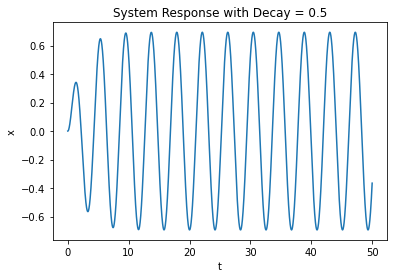

In [3]:
# Question 1
t, x = sp.impulse(transfer_func(1.5, -0.5), None, np.linspace(0, 50, 5001))
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.title('System Response with Decay = 0.5')
plt.savefig('Figure_1.png')

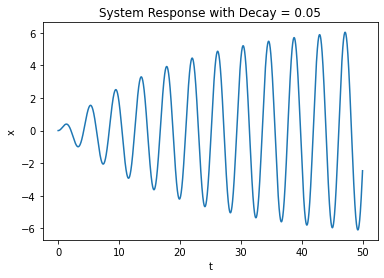

In [4]:
# Question 2
t, x = sp.impulse(transfer_func(1.5, -0.05), None, np.linspace(0, 50, 5001))
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.title('System Response with Decay = 0.05')
plt.savefig('Figure_2.png')

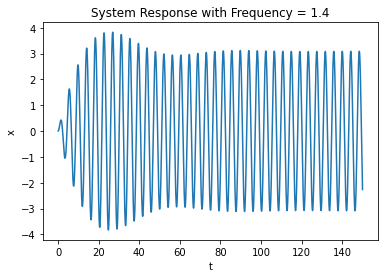

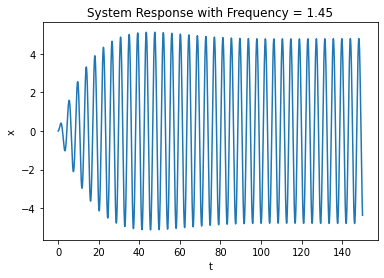

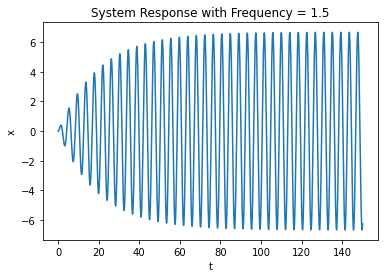

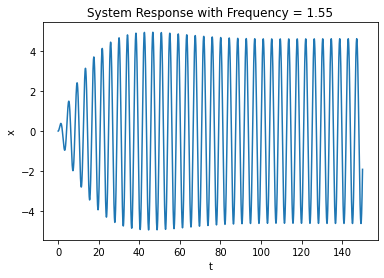

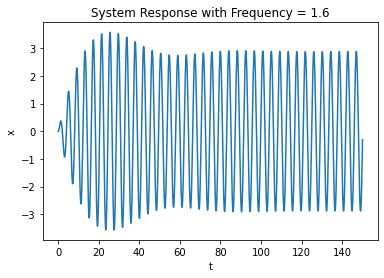

In [5]:
# Question 3
frequencies = np.linspace(1.4, 1.6, 5)

for i in range(len(frequencies)):
    t, x = sp.impulse(transfer_func(frequencies[i], -0.05), None, np.linspace(0, 150, 5001))
    plt.plot(t, x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(f'System Response with Frequency = {frequencies[i]}')
    plt.savefig(f'Figure_{i+3}')
    plt.show()

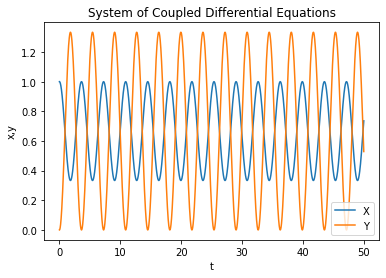

In [6]:
# Question 4

H_X = sp.lti([1,0,2],[1,0,3,0])
t,x = sp.impulse(H_X,None,np.linspace(0,50,5001))
plt.plot(t, x)

H_Y = sp.lti([2],[1,0,3,0])
t,y = sp.impulse(H_Y,None,np.linspace(0,50,5001))
plt.plot(t, y)
plt.legend(['X', 'Y'])
plt.title('System of Coupled Differential Equations')
plt.xlabel('t')
plt.ylabel('x,y')
plt.savefig('Figure_8.png')

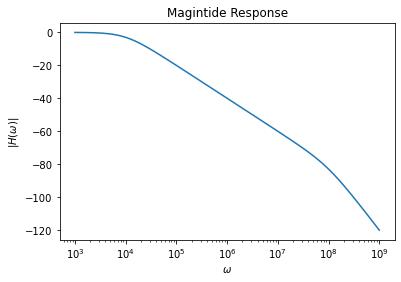

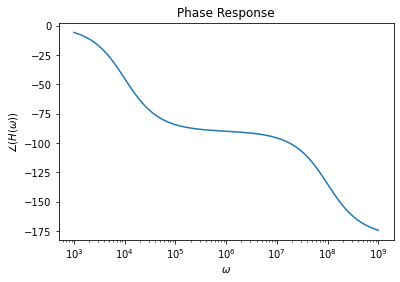

In [10]:
# Question 5

# Magnitude plot
H = sp.lti([1],[1e-6*1e-6,100*1e-6,1]) # Transfer Function
w,S,phi=H.bode() # Generating magnitude and phase
plt.semilogx(w, S)
plt.title('Magintide Response')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(\omega)|$')
plt.savefig('Figure_9.png')
plt.show()

plt.semilogx(w, phi)
plt.title('Phase Response')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\angle(H(\omega))$')
plt.savefig('Figure_10.png')
plt.show()

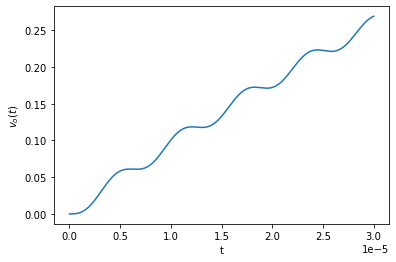

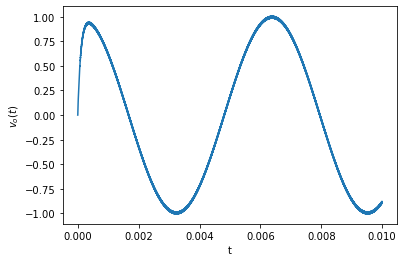

In [13]:
# Question 6

t = np.linspace(0,30*0.000001,1000)
vi = np.multiply(np.cos(1000*t)-np.cos(1000000*t),np.heaviside(t,0.5))
_,y,svec = sp.lsim(H,vi,t)

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel(r'$v_o(t)$')
plt.savefig('Figure_11.png')
plt.show()

t = np.linspace(0,10*0.001,100000)
vi = np.multiply(np.cos(1000*t)-np.cos(1000000*t),np.heaviside(t,0.5))
_,y2,svec = sp.lsim(H,vi,t)

plt.plot(t, y2)
plt.xlabel('t')
plt.ylabel(r'$v_o(t)$')
plt.savefig('Figure_12.png')
plt.show()